# Assignment 8

## Glen Quadros

### 202051211

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('/content/weight-height.csv')

In [4]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


1. Verify the Central Limit Theorem using the ”Height” feature of the data.

In [6]:
height_df = df['Height']

In [7]:
height_df.tail()

9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, dtype: float64

In [9]:
mean = height_df.mean()
std_dev = height_df.std()

In [11]:
sampling_dist = []
for i in range(1000):
    sample = np.random.choice(height_df, size=30)
    sampling_dist.append(sample.mean())

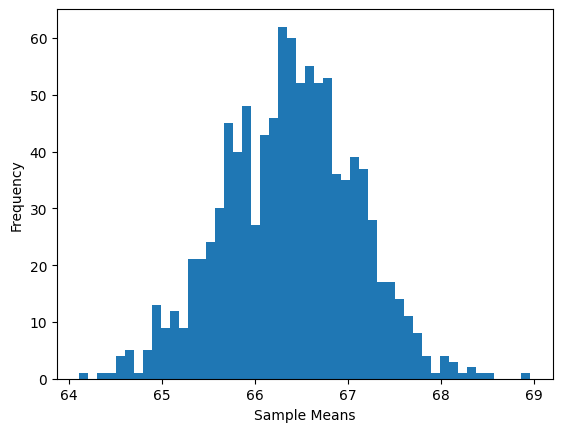

In [13]:
plt.hist(sampling_dist, bins=50)
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()

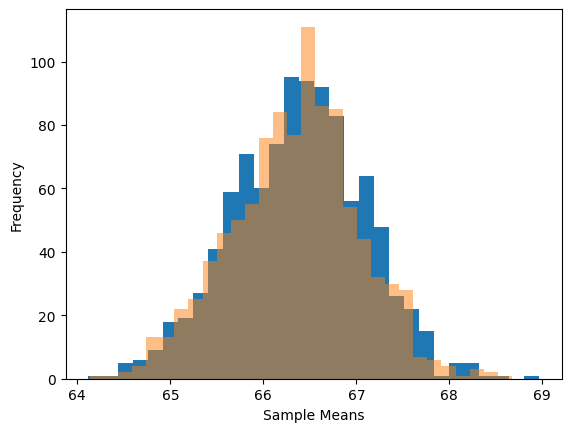

In [14]:
norm_dist = np.random.normal(mean, std_dev/np.sqrt(30), 1000)
plt.hist(sampling_dist, bins=30)
plt.hist(norm_dist, bins=30, alpha=0.5)
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()

2. Perform the Bootstrap on ”Height” feature of the data.

In [15]:
def bootstrap_sample(data):
    return np.random.choice(data, size=len(data))

In [17]:
bootstrap_samples = []
for i in range(1000):
    sample = bootstrap_sample(height_df)
    bootstrap_samples.append(sample)

In [18]:
bootstrap_means = [sample.mean() for sample in bootstrap_samples]

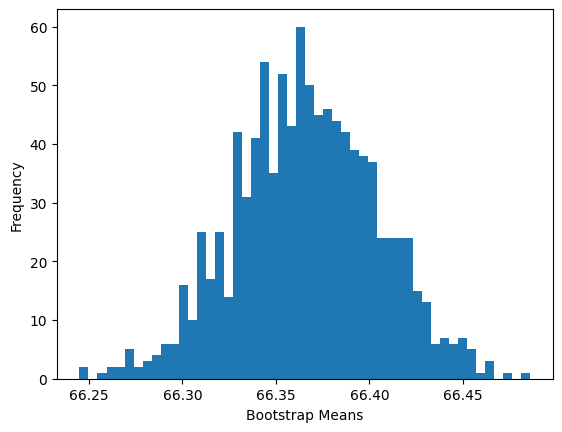

In [20]:
plt.hist(bootstrap_means, bins=50)
plt.xlabel('Bootstrap Means')
plt.ylabel('Frequency')
plt.show()

3. Calculate the Confidence Interval of 95 % using sample means derived using Bootstrap

In [21]:
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))

95% Confidence Interval: [66.29, 66.44]
